# BERTopic Clustering on Negative Comments
On va faire du topic modeling sur les tweets négatifs pour identifier les problèmes a résoudre pour l'entreprise

In [7]:
from bertopic import BERTopic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/tweets.csv')

In [9]:
def remove_mentions(text):
    return ' '.join(word for word in text.split() if not word.startswith('@'))

def remove_hashtags(text):
    return ' '.join(word for word in text.split() if not word.startswith('#'))

In [10]:
df["cleaned_text"] = df["text"].apply(remove_mentions).apply(remove_hashtags).str.lower()

In [11]:

negative_tweets = df[df['airline_sentiment'] == 'negative']['cleaned_text'].tolist()

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

topics, probs = topic_model.fit_transform(negative_tweets)

2025-12-19 14:37:48,995 - BERTopic - Embedding - Transforming documents to embeddings.


KeyboardInterrupt: 

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3711,-1_to_the_and_flight,"[to, the, and, flight, you, for, on, of, is, in]",[you have cancelled flighted our flights 5 tim...
1,0,993,0_bag_bags_luggage_baggage,"[bag, bags, luggage, baggage, lost, my, claim,...",[did i mention that i was on the plane so is m...
2,1,290,1_delayed_delay_flight_time,"[delayed, delay, flight, time, is, update, lat...","[no, the flight wasn't until 9:51pm, but it's ..."
3,2,227,2_gate_agent_at_waiting,"[gate, agent, at, waiting, sitting, the, us, w...",[hell is terrible gate agents. and a three hou...
4,3,200,3_seat_seats_window_row,"[seat, seats, window, row, upgrade, empty, pai...",[how is it that i book a flight with a reserve...
...,...,...,...,...,...
98,97,12,97_140_characters_httptcoacebo6elpa_paged,"[140, characters, httptcoacebo6elpa, paged, sp...",[in 140 characters? yea right. thanks for patr...
99,98,11,98_profits_business_company_will,"[profits, business, company, will, measured, m...",[will you be destroying lives in eastern durin...
100,99,11,99_disconnected_each_bleh_snapchat,"[disconnected, each, bleh, snapchat, enraging,...",[we are having a real issue trying to get thru...
101,100,11,100_class_first_tisk_seat,"[class, first, tisk, seat, rebooked, httptcooh...",[thanks ^mr i got rebooked already but i lost ...


In [7]:
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'bag | bags | luggage | baggage | lost', 993],
                                   [1, 'delayed | delay | flight | time | is', 290],
                                   [2, 'gate | agent | at | waiting | sitting', 227],
                                   ...,
                                   [99, 'disconnected | each | bleh | snapchat | enraging', 11],
                                   [100, 'class | first | tisk | seat | rebooked', 11],
                                   [101, 'blah | whiplash | choppiest | feed | spent', 10]],
                                  shape=(102, 3), dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': {'bdata': ('4QMiAeMAyACLAIkAfAB7AHoAZQBhAF' ... 'ANAA0ADAAMAAwADAAMAAsACwALAAoA'),
                                  'dtype': 'i2'},
                         'sizemode': 'area',
                         'sizeref': 0.620625,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('WnCVP1RGvcAxS7fA2dWKQM30uj9mwM' ... 'UcQfaTlkCpIog//yTPwNPlikCj3ffA'),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('5RWhwCsKWEG6FFtB2gpbQGtQI8A5cj' ... 'qLQUTdLcGmA5JBa35JQf4cW0Da2WZA'),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': -8.98594880104065,
                                'y': 4.2466059923172,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 5.499724507331848,
                                'xshift': 10,
                                'y': 21.043406677246093}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': 5.499724507331848,
                           'x1': 5.499724507331848,
                           'y0': -12.550194692611694,
                           'y1': 21.043406677246093},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': -8.98594880104065,
                           'x1': 19.985397815704346,
                           'y0': 4.2466059923172,
                           'y1': 4.2466059923172}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                               

In [8]:
topic_model.visualize_barchart(top_n_topics=10)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.014777447479837722, 0.019901054515076143,
                    0.023806794070605496, 0.024760783873342736,
                    0.03194362375422875],
              'xaxis': 'x',
              'y': [lost  , baggage  , luggage  , bags  , bag  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.012349812375305753, 0.015178980427596486,
                    0.01528911158538723, 0.020646815443613787, 0.03267836460472098],
              'xaxis': 'x2',
              'y': [is  , time  , flight  , delay  , delayed  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.013434993061959248, 0.014073880147285455,
                    0.015941269111621775, 0.022346937445573804,
                    0.08694335280809656],
              'xaxis': 'x3',
              'y': [sitting  , waiting  , at  , agent  , gate  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.011372101901213632, 0.014410765144653156,
                    0.014764973989741064, 0.055711475531192586,
                    0.07130707177444072],
              'xaxis': 'x4',
              'y': [upgrade  , row  , window  , seats  , seat  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.024079836497364244, 0.02693495322893043,
                    0.027635695044770828, 0.027809418372161297,
                    0.06406036622431201],
              'xaxis': 'x5',
              'y': [on  , rebook  , cancelled  , been  , hold  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.02113010993389222, 0.02365528359464031,
                    0.026881553327111077, 0.04847256313537043, 0.05811322064505034],
              'xaxis': 'x6',
              'y': [flights  , flight  , flighted  , flightled  , cancelled  ],
              'yaxis': 'y6'},
             {'marker': {'color': '#F0E442'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.016195027790793397, 0.018420297897712636,
                    0.01895180058960006, 0.054292710450295614, 0.09351479854755682],
              'xaxis': 'x7',
              'y': [online  , hold  , phone  , reservations  , reservation  ],
              'yaxis': 'y7'},
             {'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.01786090096613176, 0.019121922987432826,
                    0.02751622894416689, 0.02853079635731031, 0.052094794517520415],
              'xaxis': 'x8',
              'y': [drinks  , eat  , meal  , catering  , food  ],
              'yaxis': 'y8'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.010388607151250914, 0.012620545262066494,
                    0.012657807746224242, 0.015073204230858036,
                    0.11446101039773131],
              'xaxis': 'x9',
              'y': [with  , never  , fly  , again  , united  ],
              'yaxis': 'y9'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.015756272508339168, 0.01642850891948594,
                    0.029102250615510444, 0.050280181934633995,
                    0.06674170773967694],
              'xaxis': 'x10',
              'y': [hotels  , stay  , vouchers  , voucher  , hotel  ],
              'yaxis': 'y10'}],
    'layou

## Comparaison avec le BERTopic manuel

In [12]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" # Pour résoudre un problème de duplication de librairie qui faisait crasher mon kernel

In [13]:
import torch
from torch.optim import AdamW
from datasets import Dataset
from transformers import TrainingArguments, Trainer, DistilBertTokenizerFast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from safetensors.torch import load_file

In [14]:
from src.bert import BERTForSequenceClassification
from src.bert_topic import BERTopic

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

In [15]:
model = BERTForSequenceClassification(
    vocab_size=tokenizer.vocab_size, # Récupéré du tokenizer DistilBert
    num_labels=3,
    d_model=256,
    num_layers=4,
    num_heads=8
).to("cpu")

In [16]:
X, y = df["cleaned_text"], df["airline_sentiment"]

In [17]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)

In [18]:
X_train = tokenizer(X_train.to_list(), 
                    padding = True,
                    truncation = True,
                    max_length = 512,
                    return_tensors = 'pt')
X_val = tokenizer(X_val.to_list(), 
                    padding = True,
                    truncation = True,
                    max_length = 512,
                    return_tensors = 'pt')
X_test = tokenizer(X_test.to_list(), 
                    padding = True,
                    truncation = True,
                    max_length = 512,
                    return_tensors = 'pt')

In [19]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

In [20]:
train_dataset = Dataset.from_dict({
    "input_ids": X_train["input_ids"].tolist(),
    "attention_mask": X_train["attention_mask"].tolist(),
    "labels": y_train_enc.tolist()
})

val_dataset = Dataset.from_dict({
    "input_ids": X_val["input_ids"].tolist(),
    "attention_mask": X_val["attention_mask"].tolist(),
    "labels": y_val_enc.tolist()
})

test_dataset = Dataset.from_dict({
    "input_ids": X_test["input_ids"].tolist(),
    "attention_mask": X_test["attention_mask"].tolist(),
    "labels": y_test_enc.tolist()
})

In [21]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy="epoch",
    logging_strategy="steps",
    logging_steps=50,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    seed=42
)

In [22]:
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}



In [23]:
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     compute_metrics=compute_metrics
# )

# # Fine-tune the model
# trainer.train()

# #Evaluate the model
# trainer.evaluate()

In [24]:
model = BERTForSequenceClassification(vocab_size=30522, num_labels=3)

path_to_weights = "./results/checkpoint-2226/model.safetensors" # Vérifie bien le chemin
state_dict = load_file(path_to_weights)

model.load_state_dict(state_dict)

model.eval()

print("Modèle chargé avec succès depuis le format safetensors !")

Modèle chargé avec succès depuis le format safetensors !


In [25]:
model_topic = BERTopic(model, tokenizer, n_topics=8)

In [26]:
# Entraînement
model_topic.fit(negative_tweets)

# Affichage du résumé
info = model_topic.get_topic_info()
print(info)

# Pour voir le thême le plus fréquent
top_topic = info.loc[info['Count'].idxmax()]
print(f"\nLe problème majeur est : {top_topic['Name']}")

Training:   0%|          | 0/100 [00:03<?, ?it/s, loss=0.0355]

Clustering...


Training:   0%|          | 0/100 [00:04<?, ?it/s, loss=0.0355]

   Topic  Count                                Name
0      0    764            0_maimi_term_dal_crashes
1      1   1633           1_aviv_shv_tel_deplorable
2      2   2175  2_central_cash_touch_reimbursement
3      3    505       3_fleek_fleet_forgive_follows
4      4   1364                4_ctl_shortly_03_hdn
5      5   1293        5_reschedule_386_sabre_gives
6      6   1002            6_jacket_woo_yay_ruining
7      7    442   7_thank_thanks_reaching_enjoyable

Le problème majeur est : 2_central_cash_touch_reimbursement


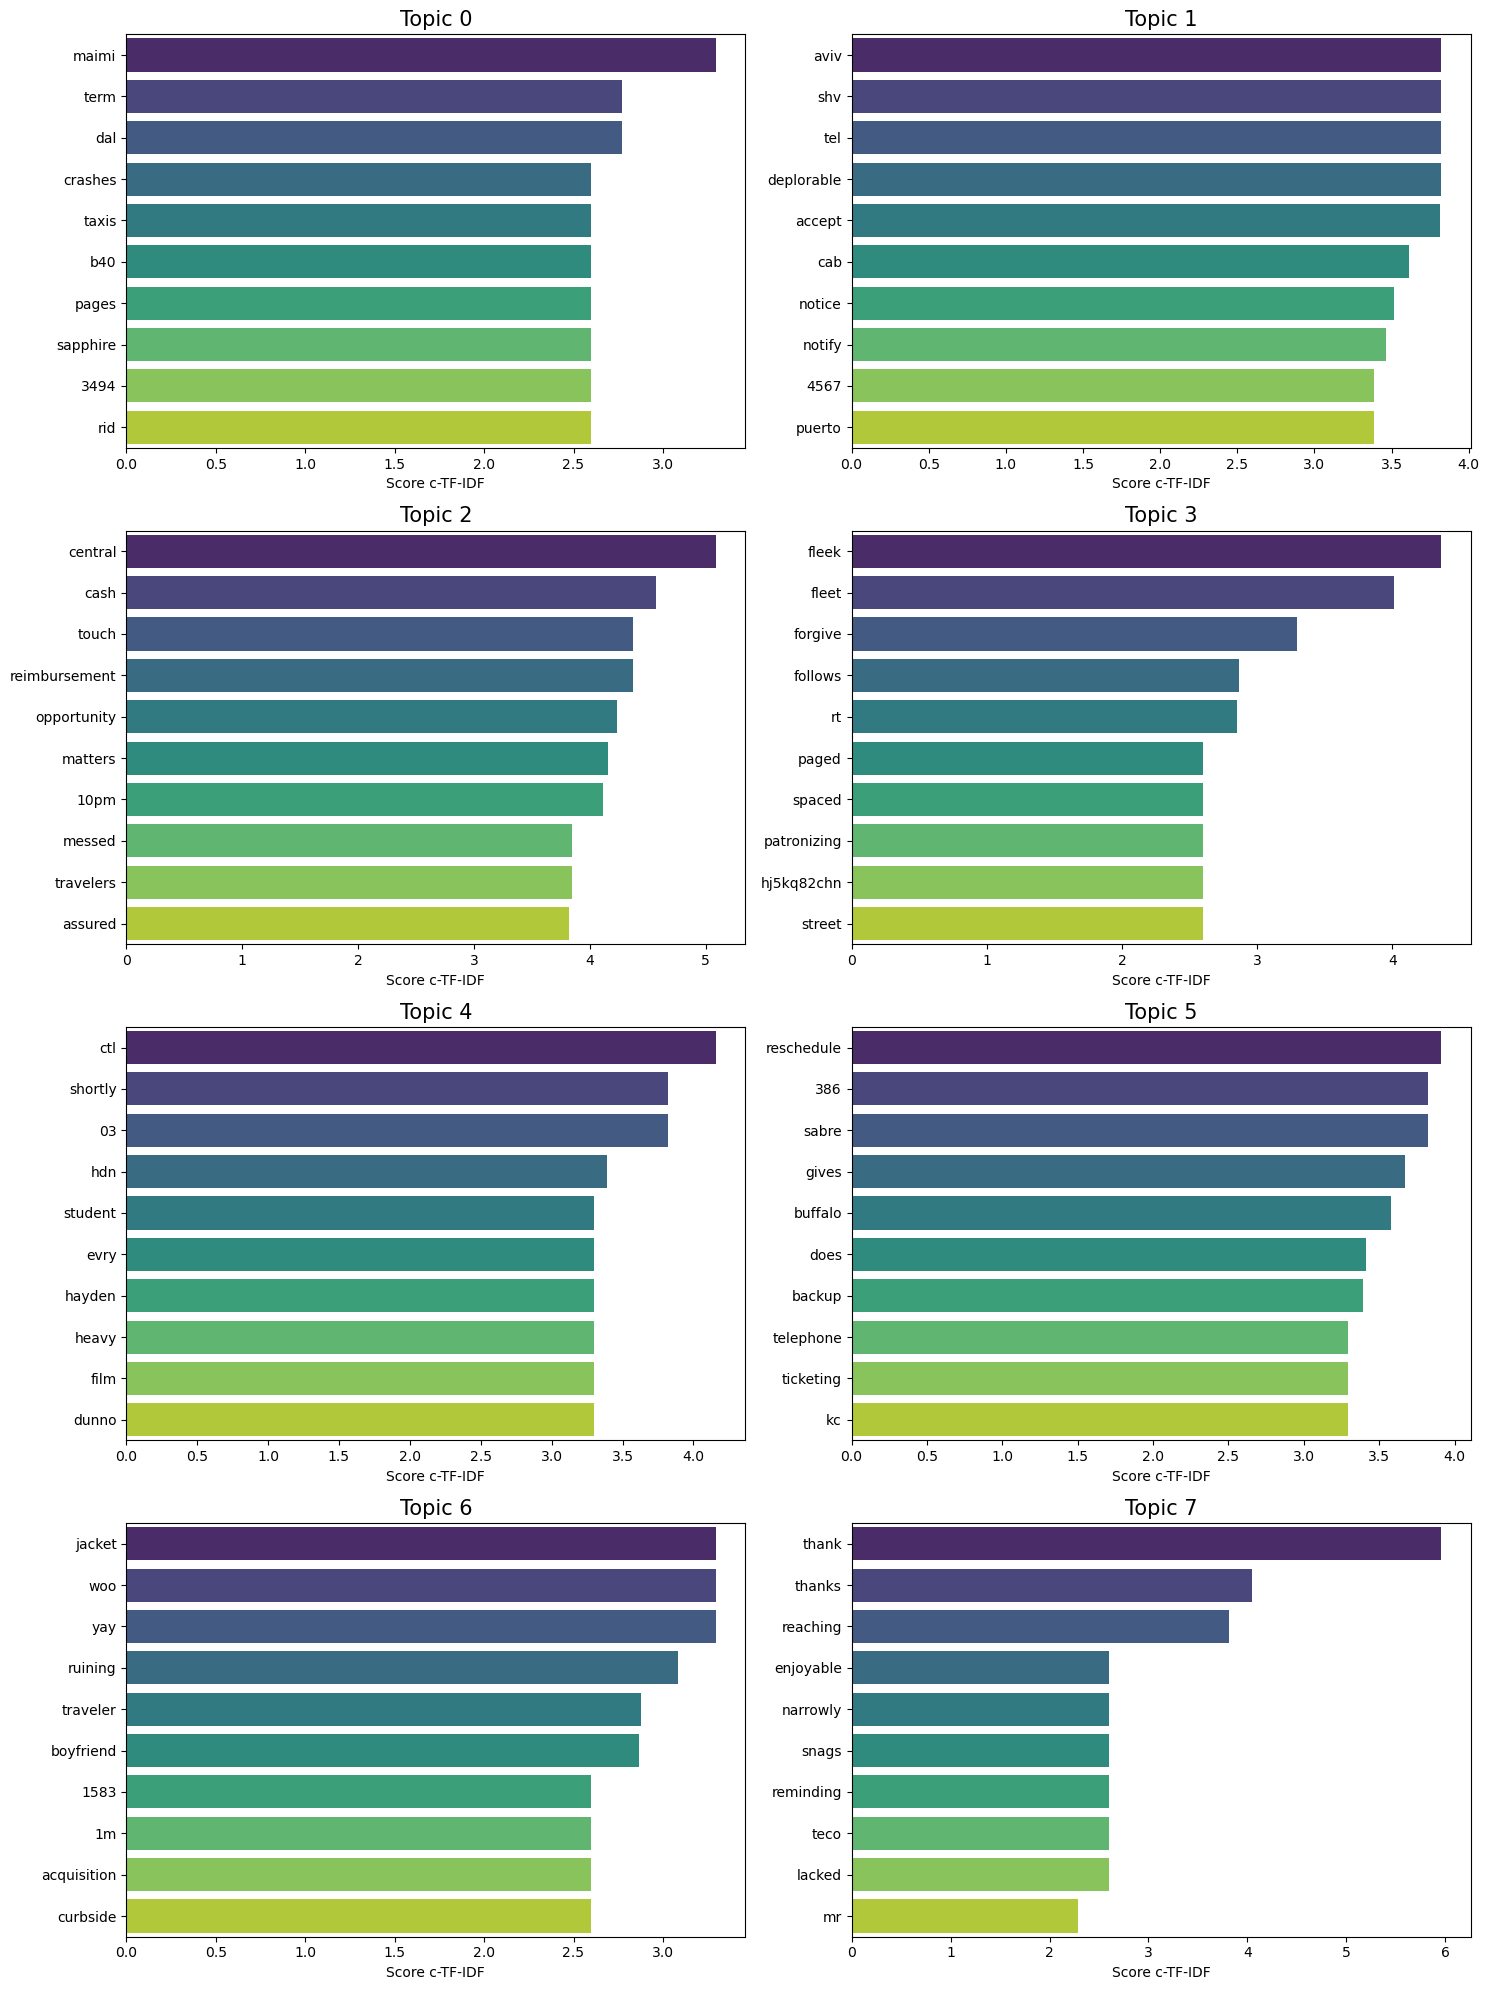

In [28]:
model_topic.visualize_barchart(8)